In [182]:
import torch
import torch.optim as optim
import matplotlib.pyplot as plt
t_c = [0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c)
t_u = torch.tensor(t_u)
t_un = t_u * 0.1

def model(t_u, w1, w2, b):
    return w2 * t_u**2 + w1 * t_u + b

def linear_model(t_u, w, b):
    return w * t_u + b

def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c)**2
    return squared_diffs.mean()


In [183]:
params = torch.tensor([1.0, 1.0, 0.0], requires_grad=True)
w = torch.ones(())
b = torch.zeros(())
t_p = model(t_u, *params)
print(t_p)

loss = loss_fn(t_p, t_c)
print(loss)

params = torch.tensor([1.0, 1.0, 0.0], requires_grad=True)
loss = loss_fn(model(t_u, *params), t_c)
loss.backward()
params.grad

tensor([1310.1901, 3180.7100, 3445.4399, 6789.5103, 3225.9900, 2440.1101,
        1183.1101,  497.0399, 2390.9600, 3708.5601, 4746.9600],
       grad_fn=<AddBackward0>)
tensor(11709471., grad_fn=<MeanBackward0>)


tensor([3.6181e+05, 2.3149e+07, 5.9642e+03])

In [184]:
params = torch.tensor([1.0, 1.0, 0.0], requires_grad=True)
learning_rate = 1e-2
optimizer = optim.SGD([params], lr=learning_rate)
tp = model(t_un, *params)
loss = loss_fn(tp, t_c)
optimizer.zero_grad()
loss.backward()
optimizer.step()
params

tensor([ -1.7968, -16.3953,  -0.4818], requires_grad=True)

In [185]:
def training_loop(n_epochs, optimizer, params, t_u, t_c, model_fn):
    for epoch in range(1, n_epochs + 1):
        t_p = model_fn(t_u, *params)
        loss = loss_fn(t_p, t_c)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if epoch % 500 == 0:
            print('Epoch %d, Loss %f' % (epoch, float(loss)))
    
    return params

In [186]:
params_init = [1.0, 1.0, 0.0]
learning_rates = [0.1, 0.01, 0.001, 0.0001]

best_loss = float('inf')
best_params = None
best_lr = None

for lr in learning_rates:
    print("Training with learning rate =", lr)
    
    params = torch.tensor(params_init, requires_grad=True)
    optimizer = optim.SGD([params], lr=lr)

    trained_params = training_loop(
        n_epochs=5000,
        optimizer=optimizer,
        params=params,
        t_u=t_un,
        t_c=t_c,
        model_fn=model  # nonlinear model
    )
    
    final_loss = loss_fn(model(t_un, *trained_params), t_c)
    print("Final loss:", float(final_loss))
    
    if final_loss < best_loss:
        best_loss = final_loss
        best_params = trained_params.clone()
        best_lr = lr
    
    print("Final params:", trained_params)
    print("")

print("Best nonlinear model learning rate:", best_lr)
print("Best nonlinear final loss:", float(best_loss))
print("Best params:", best_params)

Training with learning rate = 0.1
Epoch 500, Loss nan
Epoch 1000, Loss nan
Epoch 1500, Loss nan
Epoch 2000, Loss nan
Epoch 2500, Loss nan
Epoch 3000, Loss nan
Epoch 3500, Loss nan
Epoch 4000, Loss nan
Epoch 4500, Loss nan
Epoch 5000, Loss nan
Final loss: nan
Final params: tensor([nan, nan, nan], requires_grad=True)

Training with learning rate = 0.01
Epoch 500, Loss nan
Epoch 1000, Loss nan
Epoch 1500, Loss nan
Epoch 2000, Loss nan
Epoch 2500, Loss nan
Epoch 3000, Loss nan
Epoch 3500, Loss nan
Epoch 4000, Loss nan
Epoch 4500, Loss nan
Epoch 5000, Loss nan
Final loss: nan
Final params: tensor([nan, nan, nan], requires_grad=True)

Training with learning rate = 0.001
Epoch 500, Loss nan
Epoch 1000, Loss nan
Epoch 1500, Loss nan
Epoch 2000, Loss nan
Epoch 2500, Loss nan
Epoch 3000, Loss nan
Epoch 3500, Loss nan
Epoch 4000, Loss nan
Epoch 4500, Loss nan
Epoch 5000, Loss nan
Final loss: nan
Final params: tensor([nan, nan, nan], requires_grad=True)

Training with learning rate = 0.0001
Epoch 

In [187]:
params_linear = torch.tensor([1.0, 0.0], requires_grad=True)
optimizer_linear = optim.SGD([params_linear], lr=0.01)

trained_linear_params = training_loop(
    n_epochs=5000,
    optimizer=optimizer_linear,
    params=params_linear,
    t_u=t_un,
    t_c=t_c,
    model_fn=linear_model
)

pred_linear = linear_model(t_un, *trained_linear_params)
pred_nonlinear = model(t_un, *best_params)

loss_linear = loss_fn(pred_linear, t_c)
loss_nonlinear = loss_fn(pred_nonlinear, t_c)
print("\nLinear model final loss:", float(loss_linear))
print("Best nonlinear model final loss:", float(loss_nonlinear))

Epoch 500, Loss 7.860115
Epoch 1000, Loss 3.828538
Epoch 1500, Loss 3.092191
Epoch 2000, Loss 2.957698
Epoch 2500, Loss 2.933134
Epoch 3000, Loss 2.928648
Epoch 3500, Loss 2.927830
Epoch 4000, Loss 2.927679
Epoch 4500, Loss 2.927652
Epoch 5000, Loss 2.927647

Linear model final loss: 2.9276480674743652
Best nonlinear model final loss: 3.8615105152130127


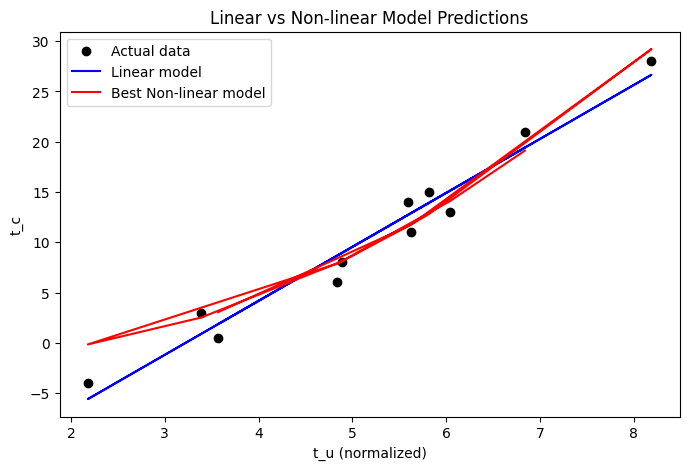

In [188]:
plt.figure(figsize=(8,5))
plt.scatter(t_un, t_c, color='black', label='Actual data')
plt.plot(t_un, pred_linear.detach(), color='blue', label='Linear model')
plt.plot(t_un, pred_nonlinear.detach(), color='red', label='Best Non-linear model')
plt.xlabel('t_u (normalized)')
plt.ylabel('t_c')
plt.title('Linear vs Non-linear Model Predictions')
plt.legend()
plt.show()